In [101]:
data<-read.csv("fashion-mnist_train.csv")

In [102]:
ohe_cols<-function(x){
     xf=factor(x)
     return(model.matrix(~xf+0))
}

In [103]:
ohe_matrix<-function(X,cols){
    X<-cbind(X,lapply(X[cols], ohe_cols))
    X<-X[,!names(X) %in% cols]
    return(X)
}

In [104]:
unique_counts<-as.data.frame(t(apply(data, 2, function(x) length(unique(x)))))

In [105]:
data<-ohe_matrix(data,c("label"))

In [106]:
test<-read.csv("fashion-mnist_test.csv")

In [107]:
test<-ohe_matrix(test,c("label"))

In [108]:
dim(data)

[1] 60000   794

In [109]:
#Shuffle data 
data<-data[sample(nrow(data)),]

In [110]:
X_train<-data[1:(as.integer(nrow(data)/100*70)),1:784]
y_train<-data[1:(as.integer(nrow(data)/100*70)),785:794]

In [111]:
X_val<-data[(as.integer(nrow(data)/100*70)+1):(as.integer(nrow(data)/100*85)),1:784]
y_val<-data[(as.integer(nrow(data)/100*70)+1):(as.integer(nrow(data)/100*85)),785:794]

In [112]:
X_test<-data[(as.integer(nrow(data)/100*85)+1):(as.integer(nrow(data))),1:784]
y_test<-data[(as.integer(nrow(data)/100*85)+1):(as.integer(nrow(data))),785:794]

In [113]:
X_true_test<-test[,1:784]
y_true_test<-test[,785:794]

In [114]:
rm(data)
rm(test)

In [115]:
#Min max normalize
norm<-function(X_col,X_tr_col){
    X_col<-(X_col - min(X_tr_col))/(max(X_tr_col)-min(X_tr_col))
    return(X_col)
}

In [116]:
X_val<-mapply(norm,X_val,X_train)
X_test<-mapply(norm,X_test,X_train)
X_true_test<-mapply(norm,X_true_test,X_train)
X_train<-mapply(norm,X_train,X_train)

In [117]:
#Make phi
phi_transform<-function(X){
    phi<-cbind(bias=rep(1,nrow(X)),X,X**2)
    return(phi)
}

In [118]:
phi_tr<-phi_transform(X_train)
phi_val<-phi_transform(X_val)
phi_test<-phi_transform(X_test)
phi_true_test<-phi_transform(X_true_test)

In [119]:
phi_tr<-as.matrix(phi_tr)
phi_val<-as.matrix(phi_val)
phi_test<-as.matrix(phi_test)
phi_true_test<-as.matrix(phi_true_test)
y_train<-as.matrix(y_train)
y_val<-as.matrix(y_val)
y_test<-as.matrix(y_test)
y_true_test<-as.matrix(y_true_test)

In [121]:
rm(X_train)
rm(X_val)
rm(X_test)
rm(X_true_test)

Warning message in rm(X_train):
“object 'X_train' not found”Warning message in rm(X_val):
“object 'X_val' not found”Warning message in rm(X_test):
“object 'X_test' not found”

In [122]:
softmax<-function(h){
    exp(h)/apply(exp(h),1,sum)
}

In [123]:
cost<-function(p,y){
    -1*sum(y*log(p))
}

In [124]:
errbest<-10000000

w<-matrix(rnorm(ncol(y_train)*ncol(phi_tr)),ncol(phi_tr),ncol(y_train))
w_best<-w

In [177]:
#Set the number of epochs
epochs<-1000
error<-c()
epoch<-c()
eta<-0.0000001
lam2<-0.001
#w<-w_best
for (i in 1:epochs){
    #calculate error on validation set
    p_val=softmax(phi_val%*%w)
    error<-c(error,cost(p_val,y_val))
    epoch<-c(epoch,i)
    if (error[i]<errbest){
        errbest<-error[i]
        w_best<-w
        }
    #Calculate new w using training set
    p_train=softmax(phi_tr%*%w)
    w<-w-eta*(t(phi_tr)%*%(p_train-y_train))-lam2*w
}

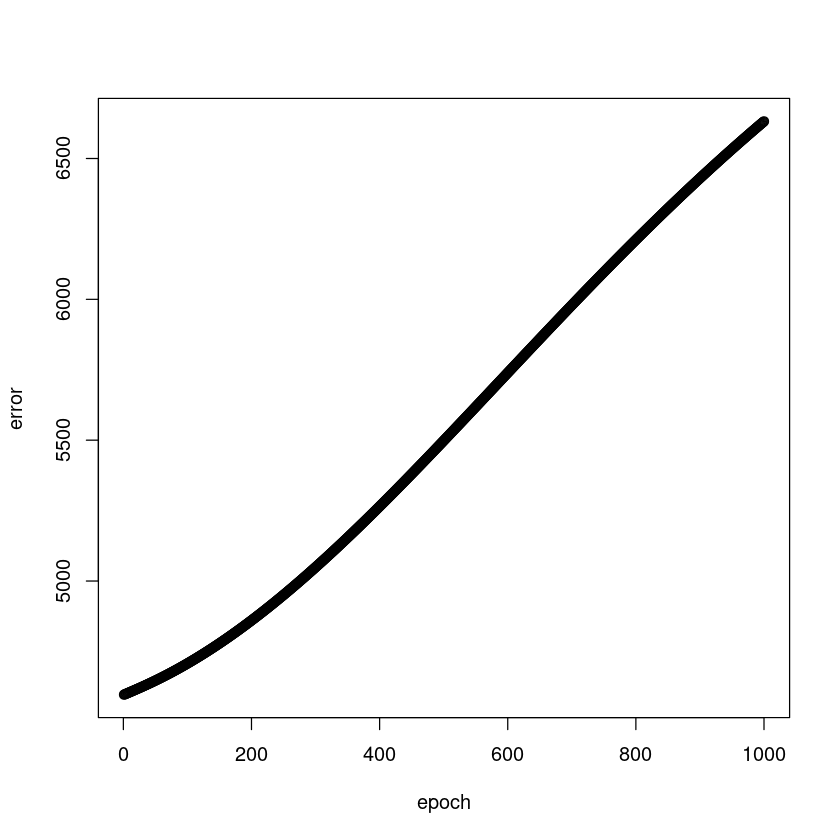

In [178]:
plot(epoch,error)

In [62]:
errbest

[1] 4796.09

In [79]:
write.csv(w_best,"w_best_mmnist.csv")

In [161]:
w<-as.matrix(read.csv("w_best_mmnist.csv"), headers=FALSE)

In [162]:
w<-w[,-c(1)]

In [163]:
w<-as.matrix(apply(w,c(1, 2),as.numeric))

In [165]:
p_val=softmax(phi_val%*%w)
y_pred=round(p_val)

In [166]:
length(y_pred[y_pred==y_val & y_val==1])/length(y_val[y_val==1])

[1] 0.7816667

In [167]:
length(y_pred[y_pred==y_val ])/length(y_pred)

[1] 0.9680222

In [170]:
p_test=softmax(phi_test%*%w)
y_pred=round(p_test)

In [171]:
length(y_pred[y_pred==y_test & y_test==1])/length(y_test[y_test==1])

[1] 0.781

In [172]:
length(y_pred[y_pred==y_test ])/length(y_pred)

[1] 0.9678556

In [173]:
#The test set we were provided
p_true_test=softmax(phi_true_test%*%w)
y_pred=round(p_true_test)

In [184]:
recall<- function(y,y_pred){
    length(y_pred[y_pred==y & y==1])/length(y[y==1])
}

In [185]:
#mapply iterates over columns for DFs
mapply(recall,as.data.frame(y_true_test),as.data.frame(y_pred))

label.xf0 label.xf1 label.xf2 label.xf3 label.xf4 label.xf5 label.xf6 label.xf7 
    0.717     0.942     0.673     0.793     0.722     0.787     0.463     0.858 
label.xf8 label.xf9 
    0.891     0.913

In [175]:
length(y_pred[y_pred==y_true_test ])/length(y_pred)

[1] 0.96687

In [ ]:
y